<a href="https://colab.research.google.com/github/SuprajaGorantla/ML-Project/blob/main/CardioVascularDiseasePredictionbyUsingMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy import linalg
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [4]:
data = pd.read_csv('/content/data - CardioVascular.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


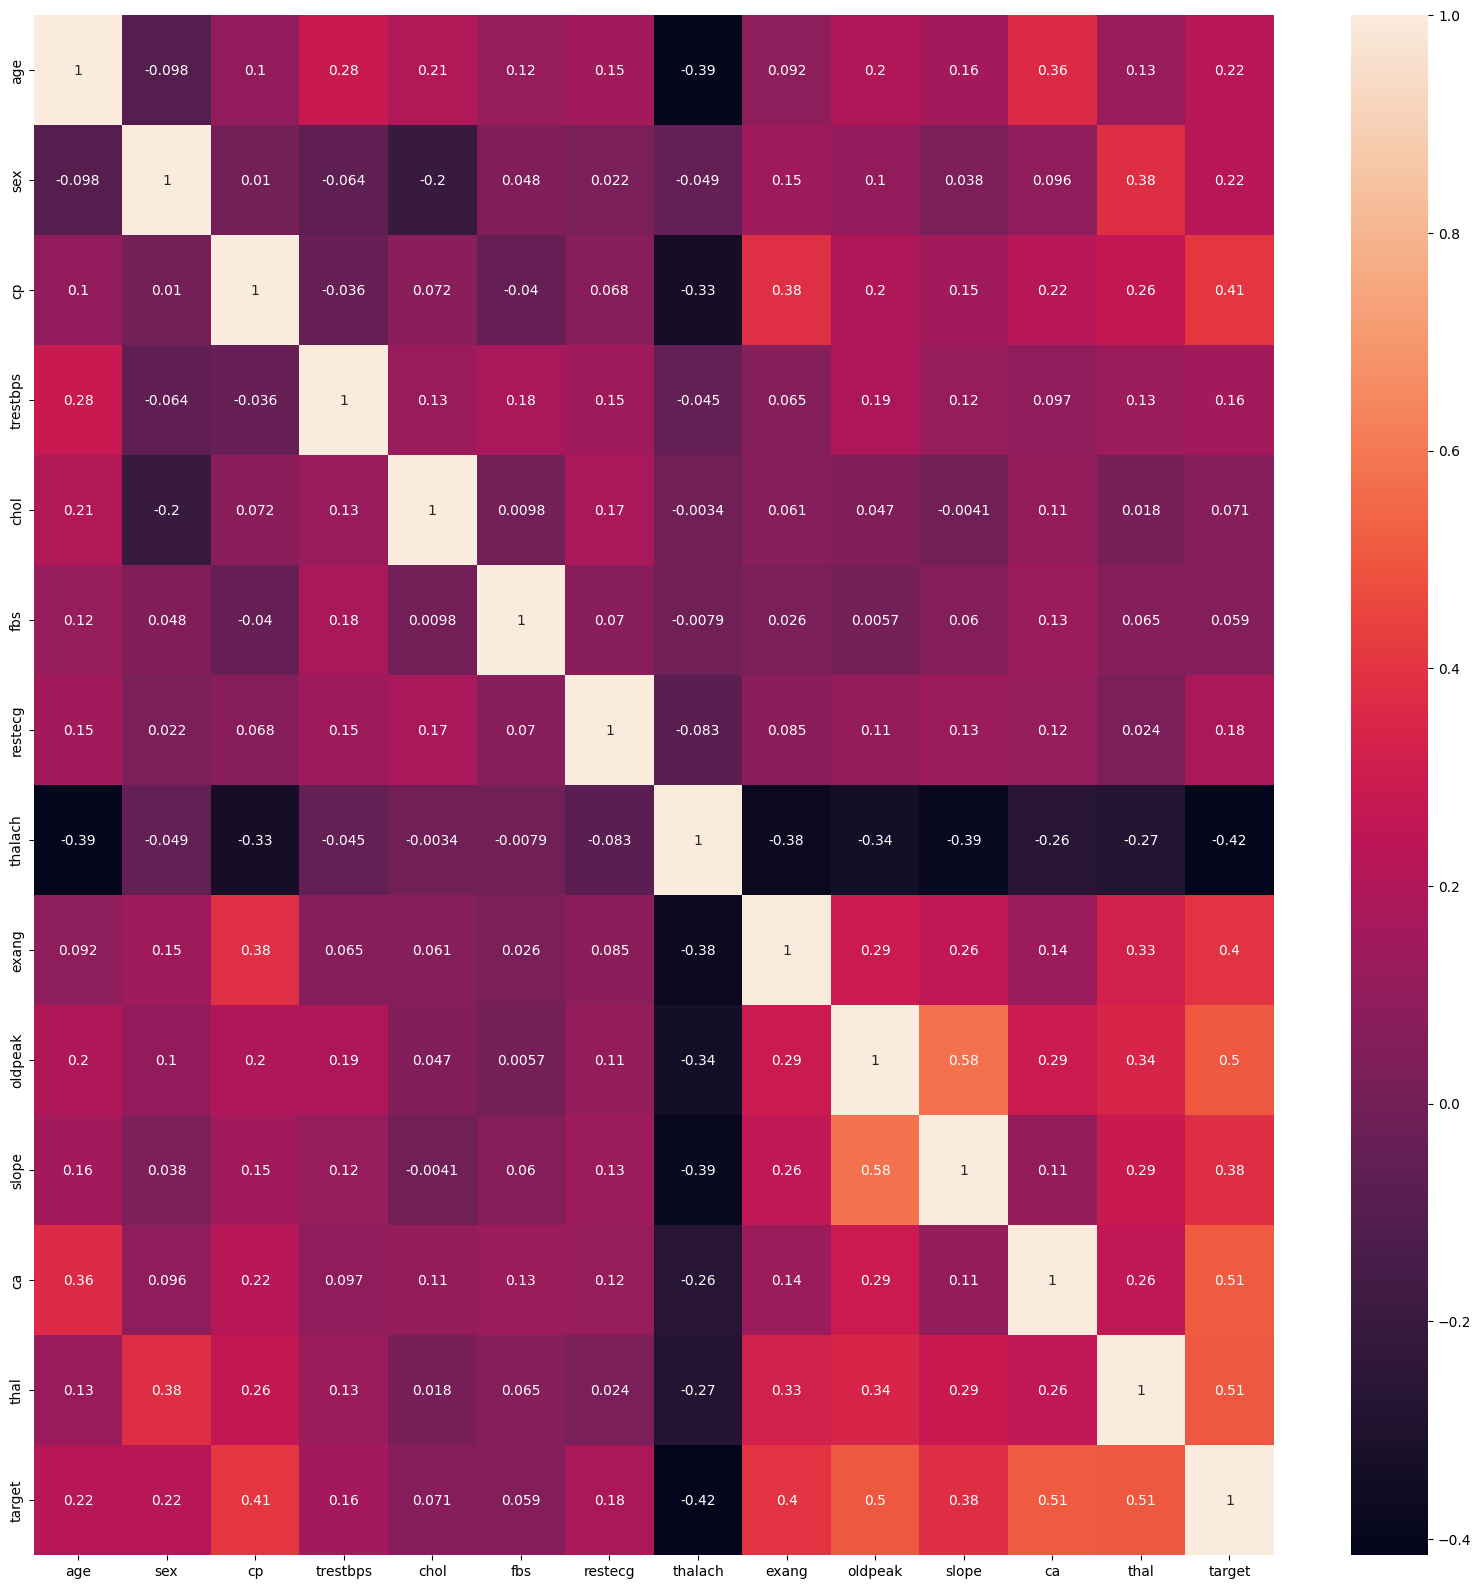

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
#SVC MOdel

In [9]:
le = LabelEncoder()
data['exang'] = le.fit_transform(data['exang']) 

In [10]:
#seperating features and targets
X = data.drop('fbs',axis=1)
y = data['fbs']


#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [11]:
baseline_model = SVC()
baseline_model.fit(X_train,y_train)

SVC()

In [12]:
base_preds = baseline_model.predict(X_test)

In [13]:
print(classification_report(base_preds,y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       122
           1       0.00      0.00      0.00         0

    accuracy                           0.80       122
   macro avg       0.50      0.40      0.45       122
weighted avg       1.00      0.80      0.89       122



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


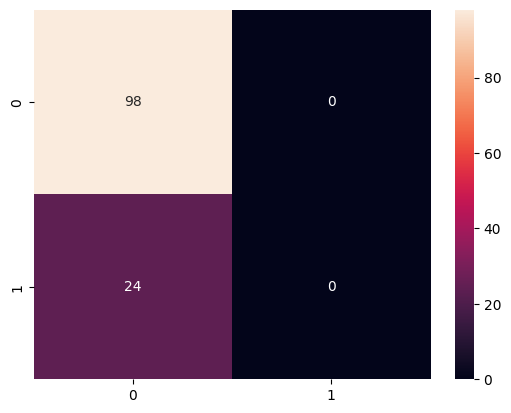

In [14]:
sns.heatmap(confusion_matrix(y_test,base_preds),annot=True,fmt='g')
plt.show()

In [15]:
confusion_matrix = confusion_matrix(y_test, base_preds)
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, base_preds
    )
roc_auc = auc(false_positive_rate, true_positive_rate)

In [16]:
def plot_roc(roc_auc, false_positive_rate, true_positive_rate):
  plt.figure(figsize=(6, 6))
  plt.title('Receiver Operating Characteristics')
  plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = {:.2f}'.format( roc_auc))
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rtae')
  plt.xlabel('False Positive Rtae')

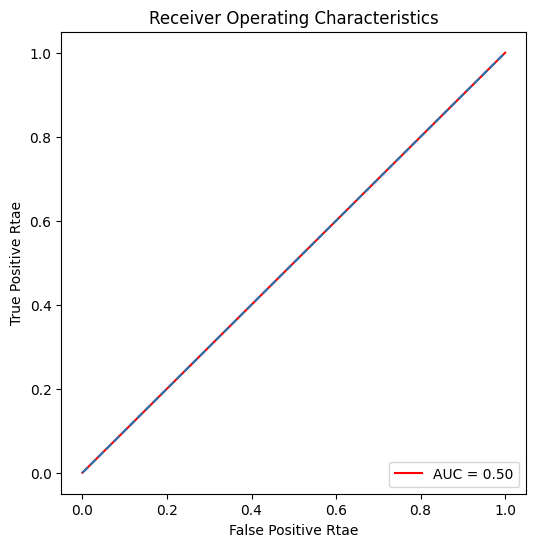

In [17]:
plot_roc(roc_auc, false_positive_rate, true_positive_rate)

In [ ]:
#Gaussian Naive bayes

In [273]:
le = LabelEncoder()
data['fbs'] = le.fit_transform(data['fbs']) 

In [274]:
X = data.drop('fbs',axis=1)
y = data['fbs']

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        51
           1       0.50      0.10      0.17        10

    accuracy                           0.84        61
   macro avg       0.67      0.54      0.54        61
weighted avg       0.79      0.84      0.79        61



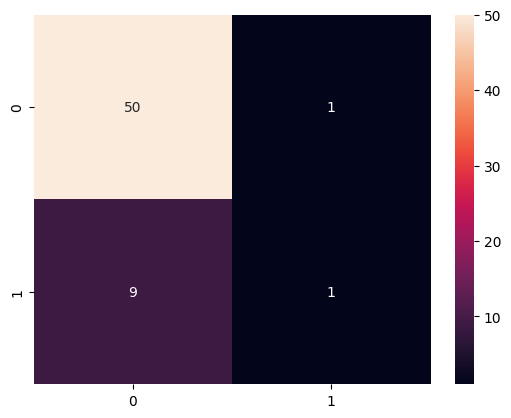

In [276]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.show()


In [277]:
confusion_matrix_qda = confusion_matrix(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, y_pred
    )
roc_auc = auc(false_positive_rate, true_positive_rate)

In [278]:
def plot_roc(roc_auc, false_positive_rate, true_positive_rate):
  plt.figure(figsize=(6, 6))
  plt.title('Receiver Operating Characteristics')
  plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = {:.2f}'.format( roc_auc))
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rtae')
  plt.xlabel('False Positive Rtae')

  

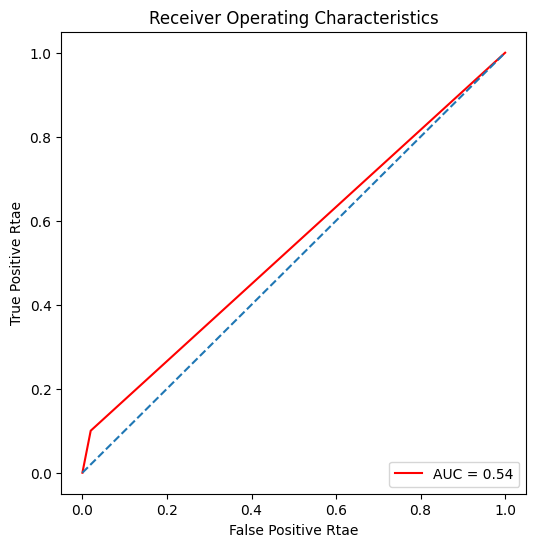

In [279]:
plot_roc(roc_auc, false_positive_rate, true_positive_rate)